# Introduction to Scipy: Fitting data

We have talked about the Numpy and Matplotlib libraries, but there is a third library that is invaluable for Scientific Analysis: [Scipy](http://www.scipy.org). Scipy is basically a very large library of functions that you can use for scientific analysis. A good place to start to find out about the top-level scientific functionality in Scipy is the [Documentation](http://docs.scipy.org/doc/scipy/reference/).

Examples of the functionality include:

* Integration (scipy.integrate)
* Optimization/Fitting (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fftpack)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multi-dimensional image processing (scipy.ndimage)

and so on.

This week, we will take a look at how to fit models to data. When analyzing scientific data, fitting models to data allows us to determine the parameters of a physical system (assuming the model is correct).

There are a number of routines in Scipy to help with fitting, but we will use the simplest one, ``curve_fit``, which is imported as follows:

In [1]:
import numpy as np
from scipy.optimize import curve_fit

The full documentation for the ``curve_fit`` is available [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit), and we will look at a simple example here, which involves fitting a straight line to a dataset.

We first create a fake dataset with some random noise:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

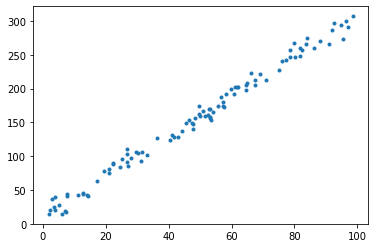

In [3]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 10. + np.random.normal(0., 10., 100) #third 100 is 100 points
plt.plot(x, y, '.')

Let's now imagine that this is real data, and we want to determine the slope (a) and intercept (b) of the best-fit line to the data. We start off by definining a function representing the model:

In [4]:
def line(x, a, b): #y=mx+b, in our case, m is a
    return a * x + b

The arguments to the function should be ``x``, followed by the parameters. We can now call ``curve_fit`` to find the best-fit parameters using a least-squares fit:

In [5]:
popt, pcov = curve_fit(line, x, y) #giving it x and y values from above, the random 
#returns popt (best fit parameters for a and b), pcov (covariance matrix, uncertainties on a and b)

The ``curve_fit`` function returns two items, which we can ``popt`` and ``pcov``. The ``popt`` argument are the best-fit paramters for ``a`` and ``b``:

In [6]:
popt

array([ 2.96222542, 11.89556909])

which is close to the initial values of ``3`` and ``10`` used in the definition of ``y``.

The reason the values are not exact is because there are only a limited number of random samples, so the best-fit slope is not going to be exactly those used in the definition of ``y``. The ``pcov`` variable contains the *covariance* matrix, which indicates the uncertainties and correlations between parameters. This is mostly useful when the data has uncertainties.

Let's now try and fit the data assuming each point has a vertical error (standard deviation) of +/-10:

In [7]:
pcov #errors on a and b are diagnonals, the cross diagnonals are how much error on a depends on b

array([[ 1.00489510e-03, -4.84178709e-02],
       [-4.84178709e-02,  3.09046306e+00]])

<ErrorbarContainer object of 3 artists>

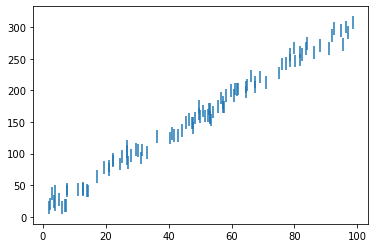

In [8]:
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt="none")

In [9]:
popt, pcov = curve_fit(line, x, y, sigma=e)

In [10]:
popt

array([ 2.96222542, 11.89556893])

Now ``pcov`` will contain the true variance and covariance of the parameters, so that the best-fit parameters are:

In [11]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)#actually sigma squared

a = 2.9622254247942816 +/- 0.03170008248525462
b = 11.895568932058836 +/- 1.7579713798368952


We can now plot the best-fit line:

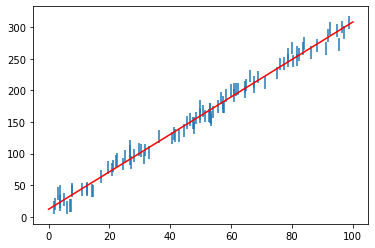

In [12]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, popt[0], popt[1]), 'r-')

You should now be able to fit simple models to datasets! Note that for more complex models, more sophisticated techniques may be required for fitting, but ``curve_fit`` will be good enough for most simple cases.

Note that there is a way to simplify the call to the function with the best-fit parameters, which is:

    line(x, *popt)

The * notation will expand a list of values into the arguments of the function. This is useful if your function has more than one or two parameters. Hence, you can do:

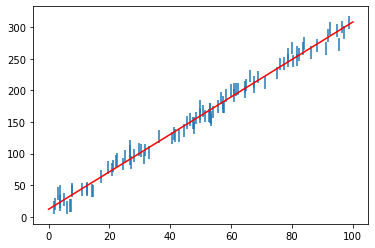

In [13]:
plt.errorbar(x, y, yerr=e, fmt="none")
plt.plot(xfine, line(xfine, *popt), 'r-')

**Important Note:** the way ``curve_fit`` determines the uncertainty is to actually renormalize the errors so that the reduced $\chi^2$ value is one, so the magnitude of the errors doesn't matter, only the relative errors. In some fields of science (such as astronomy) we do *not* renormalize the errors, so for those cases you can specify ``absolute_sigma=True`` in order to preserve the original errors.

## Exercise 1

In the following code, we generate some random data points:

In [46]:
x = np.random.uniform(0., 10., 100)
y = np.polyval([1, 2, -3], x) + np.random.normal(0., 10., 100)
e = np.random.uniform(5, 10, 100)

Fit a line and a parabola to it and overplot the two models on top of the data:

Best fit for line:
a = 11.780949098544873 +/- 0.385381211121873
b = -18.658518665786517 +/- 2.1869849693210393
Best fit for parabola:
a = 0.9137385661049268 +/- 0.1256713893535352
b = -1.5328861808703316 +/- 0.9028810551905079
c = -7.637093604391853 +/- 4.55683196762098


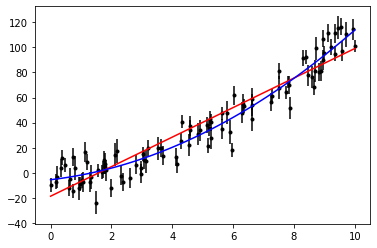

In [49]:

# your solution here
def line(x, a, b): #y=mx+b, in our case, m is a
    return a * x + b
def parabola(x,a,b,c):
    return a * (x-b)**2+c

popt_parabola, pcov_parabola = curve_fit(parabola, x, y, sigma=e)
#call the curve fit command with the line definition and the x,y,sigma values
popt_line, pcov_line = curve_fit(line, x, y, sigma=e)
xfine = np.linspace(0., 10., 100)  # define values to plot the function for, creating own x data
#Plot the x and y
plt.plot(x, y, 'k.')
#plot the errorbars on the values
plt.errorbar(x, y, yerr=e, ecolor='k', fmt="none")
plt.plot(xfine, line(xfine, *popt_line), 'r-')
plt.plot(xfine, parabola(xfine, *popt_parabola), 'b-')
print("Best fit for line:")
print("a =", popt_line[0], "+/-", pcov_line[0,0]**0.5)
print("b =", popt_line[1], "+/-", pcov_line[1,1]**0.5)#actually sigma squared
print("Best fit for parabola:")
print("a =", popt_parabola[0], "+/-", pcov_parabola[0,0]**0.5)
print("b =", popt_parabola[1], "+/-", pcov_parabola[1,1]**0.5)#actually sigma squared
print("c =", popt_parabola[2], "+/-", pcov_parabola[2,2]**0.5)


## Exercise 2

As before, we use the [data/munich_temperatures_average_with_bad_data.txt](data/munich_temperatures_average_with_bad_data.txt) file, which gives the temperature in Munich every day for several years:

In [19]:
# The following code reads in the file and removes bad values
import numpy as np
date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperature) < 90
date = date[keep]
temperature = temperature[keep]

Fit the following function to the data:

$$f(t) = a~\cos{(2\pi t + b)} + c$$

where $t$ is the time in years. Make a plot of the data and the best-fit model in the range 2008 to 2012. What are the best-fit values of the parameters? What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year? What is the meaning of the ``b`` parameter, and does its value make sense?

Best-Fit values of the parameters
a = -9.95518358310611 +/- 0.06586555743724057
b = 12.313405907533175 +/- 0.006655057706380808
c = 9.040845452192045 +/- 0.046713165015829804
The average daily values predicted by the model for coldest time of the year: -0.6 degrees Celsius
The average daily values predicted by the model for hottest time of the year: 18.68 degrees Celsius
The overall average temperature in Munich is: 9.04 degrees Celsius


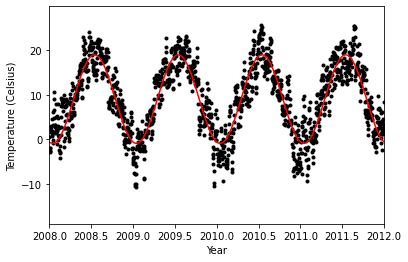

In [21]:

# your solution here
def fit_function(t,a,b,c): #first thing to pass is x value
    return a * np.cos(2*np.pi*t+b)+c

popt_function, pcov_function = curve_fit(fit_function, date, temperature)
x_funct = np.linspace(2008, 2012.0, 10000) 
plt.plot(date, temperature, 'k.')
plt.xlim(2008, 2012)
plt.plot(x_funct, fit_function(x_funct, *popt_function), 'r-')
plt.xlabel("Year")
plt.ylabel('Temperature (Celsius)')
print("Best-Fit values of the parameters")
print("a =", popt_function[0], "+/-", pcov_function[0,0]**0.5)
print("b =", popt_function[1], "+/-", pcov_function[1,1]**0.5)#actually sigma squared
print("c =", popt_function[2], "+/-", pcov_function[2,2]**0.5)

print("The average daily values predicted by the model for coldest time of the year:", round(popt_function[0]*np.cos(2*np.pi*2009.0+popt_function[1])+popt_function[2],2), "degrees Celsius")
print("The average daily values predicted by the model for hottest time of the year:", round(popt_function[0]*np.cos(2*np.pi*2009.5+popt_function[1])+popt_function[2],2), "degrees Celsius")
#to find the overall average temperature in Munich we need to take the integral of the function from
#2008.0 to 2012.0 and multiply that result by 1/(b-a). I am going to use the simpson's rule code
#I made earlier. 
def f(t):
    return popt_function[0] * np.cos(2*np.pi*t+popt_function[1])+popt_function[2]

def simpson_rule(N,a,b):
    h = (b-a)/N
    odd = 0
    even = 0
    for k in range (1, N, 2):
        odd += f(a+k*h)
    for k in range (2,N,2):
        even += f(a+k*h)
    integral = 1/3*h*(f(a) + f(b) + 4*odd + 2*even)
    return integral
print("The overall average temperature in Munich is:", round(1/(2012.0-2008.0)*simpson_rule(1000, 2008.0, 2012.0),2), "degrees Celsius") 
#The overall average temperature in Munich is the same as the vertical shift in the function. It makes sense that the vertical
#shift is the average overall temperature because this is the equilibrium axis. The cosine wave is oscillating around this 
#equilibrium axis. 

#a is the amplitude of the wave,c is the vertical shift, b is the phase shift. The phase shift is the 
#value to shift the whole cosine wave either to the right or left. If it is positive it will be shift to the left. 
#In our plot, the phase shift is to the left about 12 radians. 
#The phase shift is needed because the curve is not a perfect cosine wave.The b value makes sense as it is 12
# and there are 12 months in each of the years and the cycle of the cosine wave is 12 months. 